In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro_blurred = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro_blurred.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

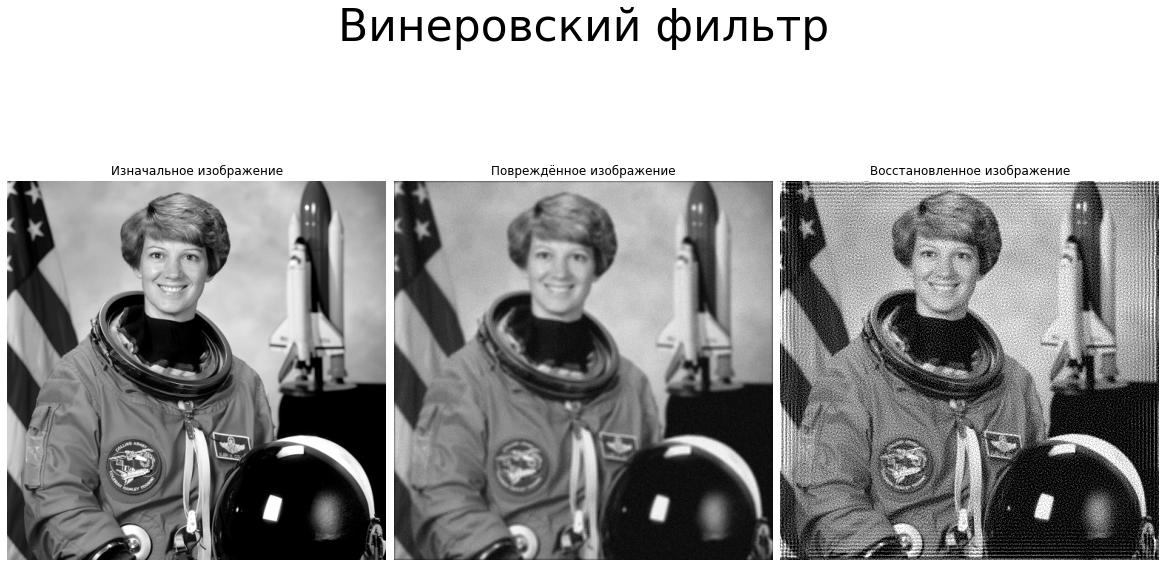

In [2]:
import deconv as d
import graphics as g

est = d.wiener_filter(astro_noisy, psf)
g.plot3imgs(astro, astro_noisy, est, suptitle='Винеровский фильтр')

## Richardson-Lucy deconvolution

In [ ]:
image = np.copy(astro_noisy)
PSF = np.copy(psf)
latent_est = np.ones(astro.shape)
PSF_HAT = PSF[::-1, ::-1]
for i in range(30):
    est_conv      = conv2(latent_est,PSF,'same')
    relative_blur = image/est_conv
    error_est     = conv2(relative_blur,PSF_HAT,'same')
    latent_est    = latent_est * error_est
    
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(latent_est, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

## Wiener filter

In [ ]:
from numpy.fft import fft2
PSF1 = np.zeros(astro.shape)
PSF1[:PSF.shape[0], :PSF.shape[1]] = PSF
image_noisy = fft2(astro_noisy)
image_bell1 = fft2(PSF1)


image_x_ = image_noisy/image_bell1 * np.absolute(image_bell1)**2/(np.absolute(image_bell1)**2 + 0.002)
latent_est = np.fft.ifft2(image_x_)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(np.real(latent_est), vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using Wiener filter')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

## Регуляризация Тихонова

In [ ]:
lapl = np.asarray([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
lapl1 = np.zeros(astro.shape)
lapl1[:lapl.shape[0], :lapl.shape[1]] = lapl
Lapl = fft2(lapl1)

gamma = 0.1

image_x_ = image_noisy*(np.conj(image_bell1)/(np.absolute(image_bell1)**2 + gamma * np.absolute(Lapl)**2))
latent_est = np.fft.ifft2(image_x_)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(np.real(latent_est), vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using Tykhonov regularization')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()